In [1]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
%matplotlib inline

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
url = 'https://raw.githubusercontent.com/ferdinjoe/DSA206/main/carrental%202019.csv'
data = pd.read_csv(url)
data.head(5)

,created_at,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,...,discount_amount,promotion_amount,redeem_amount,total_amount,hold_amount,tax_withholding,status,confirm_at,complete_at,cancel_at
0,12/31/2019 19:34,DM5427-26129,ios,credit,5427:Mini Countryman,private,Mini,Countryman,car,5.0,...,0.0,0.0,0.0,42693.0,0,0.0,complete,12/31/2019 20:46,1/7/2020 22:44,NaN
1,12/31/2019 14:02,DM5619-26120,web,transfer,5619:Honda City,private,Honda,City,car,2.0,...,0.0,300.0,0.0,1999.2,5000,98.0,complete,48:18.7,15:30.3,NaN
2,12/31/2019 9:37,DM6425-26102,web,transfer,6425:Mazda 2,private,Mazda,2,car,1.0,...,0.0,0.0,0.0,1048.6,5000,0.0,complete,48:50.6,48:31.4,NaN
3,12/30/2019 23:05,DM6010-26093,ios,credit,6010:Toyota Yaris,local,Toyota,Yaris,car,1.0,...,0.0,0.0,0.0,1358.9,0,0.0,complete,06:24.2,28:00.5,NaN
4,12/30/2019 20:28,DM1907-26090,web,credit,1907:Toyota Vios,private,Toyota,Vios,car,2.0,...,0.0,300.0,0.0,2203.2,0,108.0,complete,38:36.1,15:30.5,NaN


In [34]:
data.isnull().sum()

created_at                    0
order_id                      0
rent_channel                  0
payment_method                3
car                          83
car__owner__user_status      83
car__brand                   83
car__model                   83
rental_category               9
total_period                  0
price_per_day                 0
total_price                   0
insurance_price               1
insurance_amount              0
vat_amount                    0
commission                    0
discount_amount               1
promotion_amount              0
redeem_amount                 1
total_amount                  0
hold_amount                   0
tax_withholding               1
status                        0
confirm_at                    0
complete_at                1100
cancel_at                  2929
dtype: int64

In [35]:
df = data.copy()

In [36]:
#drop complete_at and cancel_at column
df.drop(columns=['complete_at','cancel_at'],inplace=True)
df['car'] = df['car'].fillna(df['car'].mode()[0])
df.isnull().sum()

created_at                  0
order_id                    0
rent_channel                0
payment_method              3
car                         0
car__owner__user_status    83
car__brand                 83
car__model                 83
rental_category             9
total_period                0
price_per_day               0
total_price                 0
insurance_price             1
insurance_amount            0
vat_amount                  0
commission                  0
discount_amount             1
promotion_amount            0
redeem_amount               1
total_amount                0
hold_amount                 0
tax_withholding             1
status                      0
confirm_at                  0
dtype: int64

In [37]:
df['car__owner__user_status'] = df['car__owner__user_status'].fillna(df['car__owner__user_status'].mode()[0])
df['car__brand'] = df['car__brand'].fillna(df['car__brand'].mode()[0])
df['car__model'] = df['car__model'].fillna(df['car__model'].mode()[0])

In [40]:
df.dropna(inplace = True)

In [6]:
#df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
#df.isnull().sum()

In [41]:
#Transform string to date
from datetime import date
#change created_at column to be in the form of datetime
df['created_at'] = pd.to_datetime(df.created_at)
#add column date by select only date from created_at column
df['date'] = pd.to_datetime(df['created_at']).dt.date
#add column time by select only time from created_at column
df['time'] = pd.to_datetime(df['created_at']).dt.time

In [42]:
#add column year, month, and day_name from created_at column
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['day_name'] =df['created_at'].dt.day_name()


In [43]:
#drop column created_at and delete rows in state column that contain cancel or failed
df.drop(columns=['created_at'],inplace=True) 
df = df[~(df['status'] == 'cancel')]  
df = df[~(df['status'] == 'failed')]  

In [44]:
# new data frame with split value columns
new = df['car'].str.split(":", n = 1, expand = True)
df["car_num"]= new[0]
df["car_name"]= new[1]
df.head()

,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,price_per_day,...,tax_withholding,status,confirm_at,date,time,year,month,day_name,car_num,car_name
0,DM5427-26129,ios,credit,5427:Mini Countryman,private,Mini,Countryman,car,5.0,6480.0,...,0.0,complete,12/31/2019 20:46,2019-12-31,19:34:00,2019,12,Tuesday,5427,Mini Countryman
1,DM5619-26120,web,transfer,5619:Honda City,private,Honda,City,car,2.0,850.0,...,98.0,complete,48:18.7,2019-12-31,14:02:00,2019,12,Tuesday,5619,Honda City
2,DM6425-26102,web,transfer,6425:Mazda 2,private,Mazda,2,car,1.0,700.0,...,0.0,complete,48:50.6,2019-12-31,09:37:00,2019,12,Tuesday,6425,Mazda 2
3,DM6010-26093,ios,credit,6010:Toyota Yaris,local,Toyota,Yaris,car,1.0,990.0,...,0.0,complete,06:24.2,2019-12-30,23:05:00,2019,12,Monday,6010,Toyota Yaris
4,DM1907-26090,web,credit,1907:Toyota Vios,private,Toyota,Vios,car,2.0,850.0,...,108.0,complete,38:36.1,2019-12-30,20:28:00,2019,12,Monday,1907,Toyota Vios


Handing outliers

In [215]:
Q1 = df['total_amount'].quantile(0.25)
Q3 = df['total_amount'].quantile(0.75)
IQR = Q3-Q1

In [216]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

10625.1

In [217]:
out1 = df[(df['total_amount'] < lower)].values
out2 = df[(df['total_amount'] > upper)].values
df['total_amount'].replace(out1, lower, inplace = True)
df['total_amount'].replace(out2, upper, inplace = True)

Which car brand is the most rented? 

In [218]:
#group by car brand and sort by descending
car_brand = df.groupby('car__brand')['car__brand'].count().sort_values(ascending=False)

In [219]:
#store car brand
brand = [] 
for i in car_brand.index:
    brand.append(i)
    
print(brand)

['Toyota', 'Honda', 'Mazda', 'Nissan', 'BMW', 'Mitsubishi', 'Hyundai', 'Suzuki', 'Mercedes Benz', 'MG', 'Mini ', 'Chevrolet', 'Ford', 'Audi', 'Isuzu', 'Porsche', 'Volkswagen', 'Bentley', 'Volvo']


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


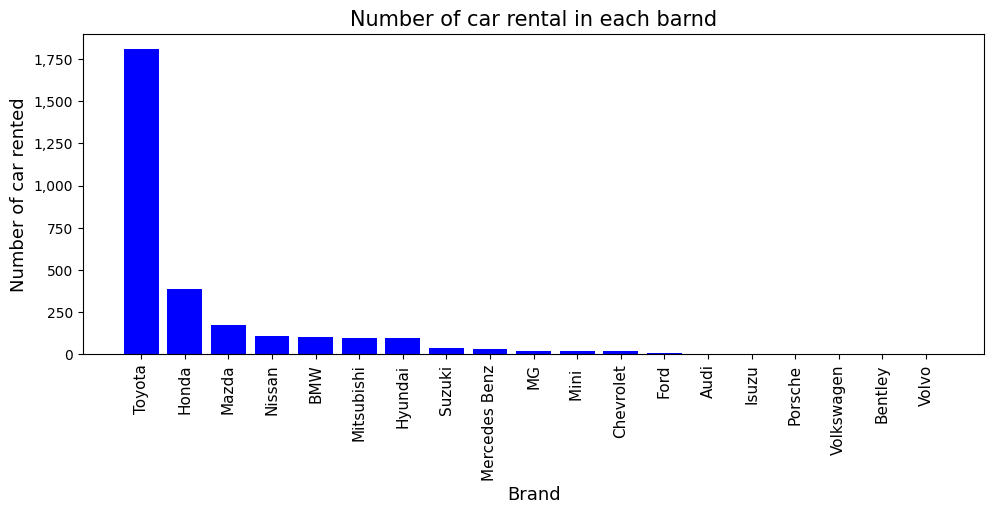

In [220]:
fig , ax = plt.subplots(figsize=(10,5))
plt.bar(brand,car_brand,color='b')
plt.xlabel('Brand', fontsize = 13)
plt.xticks(brand)
plt.xticks(brand, rotation ='vertical', size=11)
plt.ylabel('Number of car rented', fontsize = 13)
plt.tight_layout()
plt.title('Number of car rental in each barnd', fontsize = 15)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

We can see from the graph that Toyota has the highest number of car rentals followed by Honda, Mazda, and Mitsubishi.


Q2: Total Sales of each brand

In [221]:
sum_brand = df.groupby('car__brand')['total_amount'].sum().sort_values(ascending=False)

In [222]:
#store car brand
brand = [] 
for i in sum_brand.index:
    brand.append(i)
    
print(brand)

['Toyota', 'Honda', 'BMW', 'Hyundai', 'Porsche', 'Mazda', 'Mercedes Benz', 'Mitsubishi', 'Nissan', 'Mini ', 'Chevrolet', 'Audi', 'MG', 'Suzuki', 'Ford', 'Isuzu', 'Bentley', 'Volvo', 'Volkswagen']


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


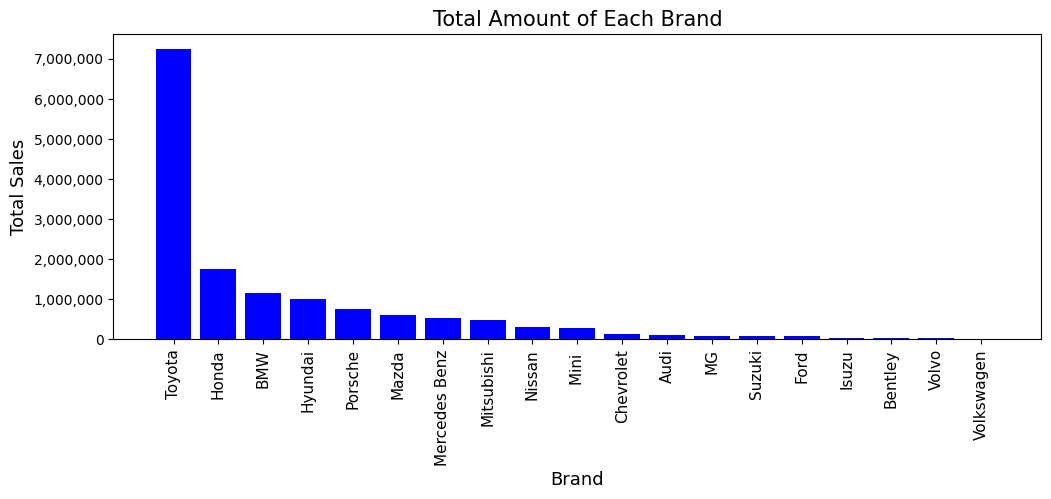

In [223]:
fig , ax = plt.subplots(figsize=(10,5))
plt.bar(brand,sum_brand,color='b')
plt.xlabel('Brand', fontsize = 13)
plt.xticks(brand)
plt.xticks(brand, rotation ='vertical', size=11)
plt.ylabel('Total Sales', fontsize = 13)
plt.tight_layout()
plt.title('Total Amount of Each Brand', fontsize = 15)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

Q3: what model of Toyota has the highest number of rented?

In [224]:
toyota = df[df['car_name'].str.contains('Toyota')]
car_toyota = toyota.groupby('car_name')['car_name'].count()
car_toyota

car_name
Toyota Alphard            15
Toyota Altis             422
Toyota Avanza             30
Toyota C-HR              118
Toyota Camry              56
Toyota Coaster             1
Toyota Estima              1
Toyota Fortuner           92
Toyota Hiace Commuter    139
Toyota Innova             15
Toyota Prius               9
Toyota Revo                1
Toyota Sienta             78
Toyota Vellfire            3
Toyota Ventury             7
Toyota Vios              285
Toyota Yaris             534
Toyota Yaris Ativ          2
Name: car_name, dtype: int64

In [225]:
model_toyota_price = toyota.groupby('car_name')['price_per_day'].mean()

In [226]:
toyota.groupby('car_name')['total_amount'].sum()

car_name
Toyota Alphard            182884.40
Toyota Altis             1585919.64
Toyota Avanza              82109.19
Toyota C-HR               559768.13
Toyota Camry              237161.70
Toyota Coaster              4815.00
Toyota Estima               4280.00
Toyota Fortuner           550125.84
Toyota Hiace Commuter     214686.57
Toyota Innova             159452.60
Toyota Prius               30647.73
Toyota Revo                 2244.00
Toyota Sienta             275891.78
Toyota Vellfire           160080.60
Toyota Ventury             90819.20
Toyota Vios              1155927.04
Toyota Yaris             1932561.05
Toyota Yaris Ativ          23219.00
Name: total_amount, dtype: float64

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


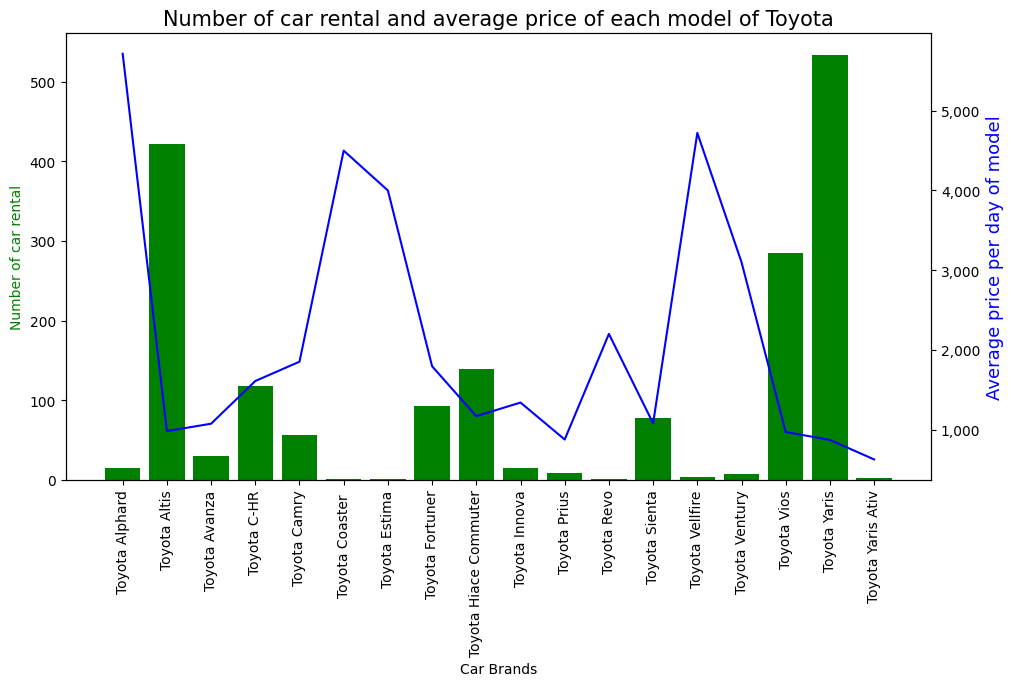

In [227]:
fig , ax1 = plt.subplots(figsize=(10,5))
model = [car_name for car_name, df in toyota.groupby('car_name')]
ax2 = ax1.twinx()
ax1.bar(model,car_toyota,color= 'g')
ax2.plot(model,model_toyota_price, 'b-')

plt.xticks(model)
plt.ylabel('Number of car rented', fontsize = 13)
plt.tight_layout()

ax1.set_xlabel('Car Brands')
ax1.set_ylabel('Number of car rental', color='g')
ax2.set_ylabel('Average price per day of model', color= 'b', fontsize = 13)
ax1.set_xticklabels(model, rotation='vertical', size = 10)
plt.title('Number of car rental and average price of each model of Toyota', fontsize = 15)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

Toyota Yaris has the highest number of rented car follow by Toyota Atlis and Toyota Vios. Beacuse price per day of Yaris and Vios are low compare to price per day of Alphard, Coaster and Estima. But we can see that price of Toyota Yaris Ativ is the lowest but why the number of rented are low. That is because this is new car that came out in the November which is quite the end of the year, so many people may not know about this model that much due to this dataset only collected untill the end of year 2019.


Overview of all brand and model

In [228]:
results = df.groupby('car_name')['car_name'].count()
results.sort_values(ascending=False)

car_name
Toyota Yaris               534
Toyota Altis               422
Toyota Vios                285
Honda City                 167
Mazda 2                    165
                          ... 
Suzuki Ertiga                1
Mercedes Benz S Class        1
Mercedes Benz SLK Class      1
Nissan Sylphy                1
Volvo S90                    1
Name: car_name, Length: 76, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


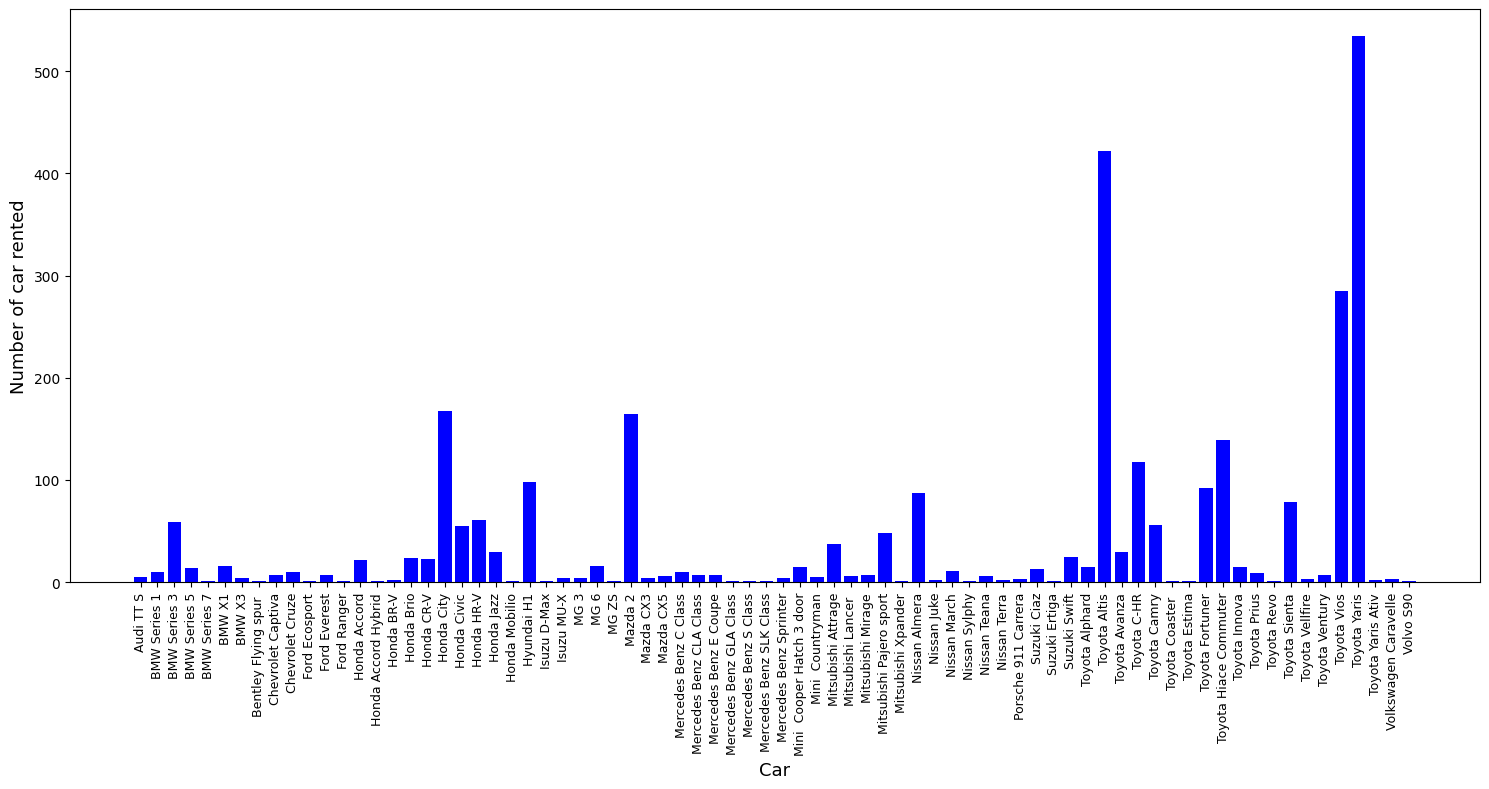

In [229]:
fig , ax = plt.subplots(figsize=(15,8))
cars = [car_name for car_name, df in df.groupby('car_name')] 
plt.bar(cars,results,color='b')
plt.xlabel('Car', fontsize = 13)
plt.xticks(cars)
plt.xticks(cars, rotation ='vertical', size=9)
plt.ylabel('Number of car rented', fontsize = 13)
plt.tight_layout()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

Honda group, Mazda, and Nissan have the high number of car rentals as well, by Honda City is the highest rented car of Honda,
Mazda 2 for Mazda group and Nissan Almera for Nissan group.

In [230]:
prices_car_model= df.groupby('car_name').mean()['price_per_day']
prices_car_model

car_name
Audi TT S                6300.000000
BMW Series 1             2000.000000
BMW Series 3             4314.509322
BMW Series 5             6786.915886
BMW Series 7            12000.000000
                            ...     
Toyota Vios               969.354281
Toyota Yaris              869.925674
Toyota Yaris Ativ         625.000000
Volkswagen Caravelle     3833.333333
Volvo S90                9900.000000
Name: price_per_day, Length: 76, dtype: float64

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


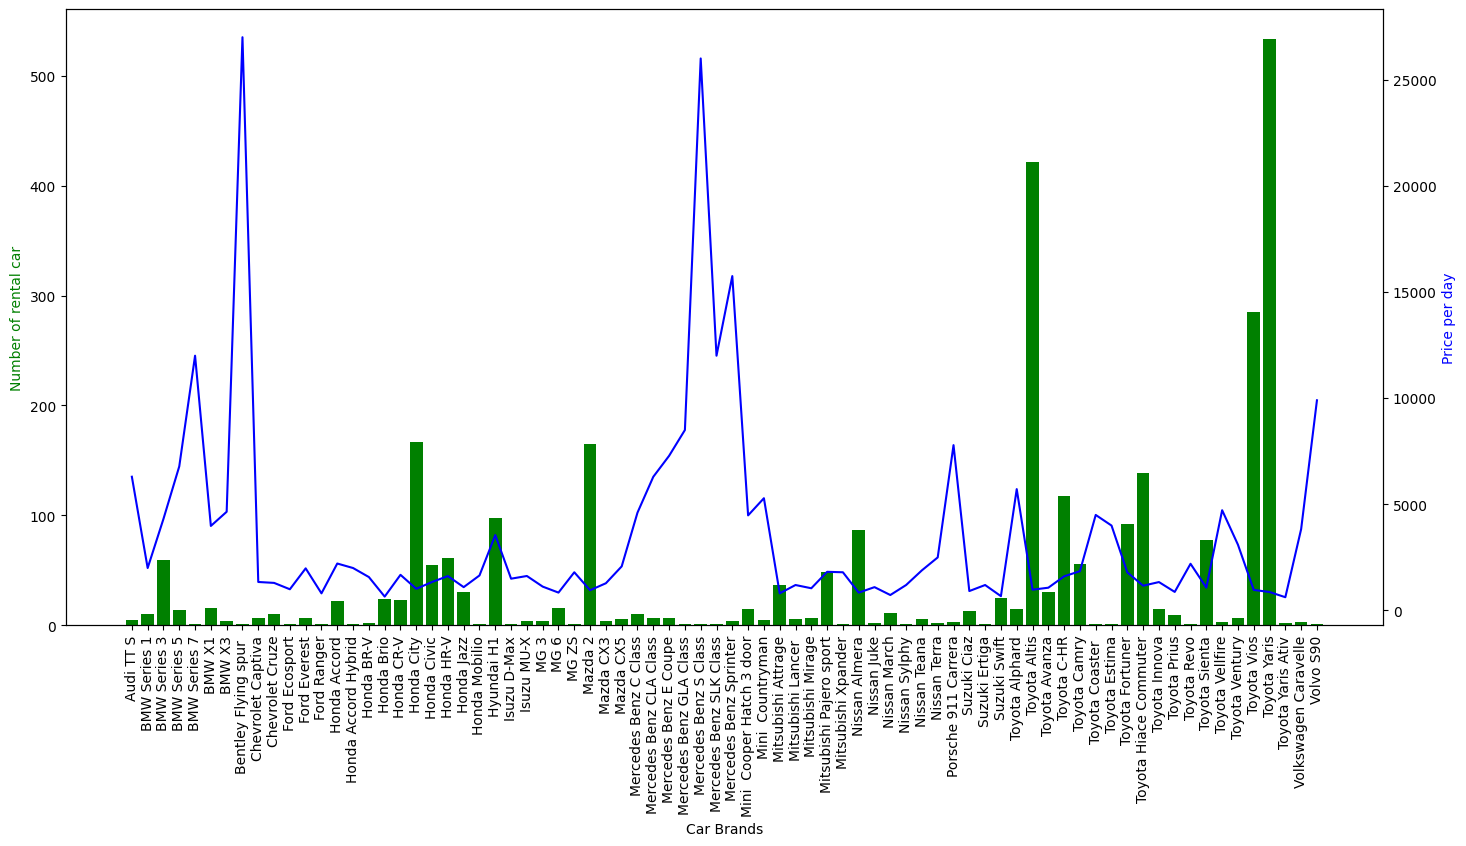

In [231]:
fig , ax1 = plt.subplots(figsize=(17,8))

ax2 = ax1.twinx()
ax1.bar(cars,results, color='g')
ax2.plot(cars,prices_car_model, 'b-')

ax1.set_xlabel('Car Brands')
ax1.set_ylabel('Number of rental car', color='g')
ax2.set_ylabel('Price per day', color= 'b')
ax1.set_xticklabels(cars, rotation='vertical', size = 10)

plt.show()

Then Let's look at Price per day for each brand

In [232]:
car_brand = df.groupby('car__brand')['car__brand'].count()

In [233]:
car_brand

car__brand
Audi                5
BMW               104
Bentley             1
Chevrolet          17
Ford                9
Honda             386
Hyundai            98
Isuzu               5
MG                 21
Mazda             175
Mercedes Benz      31
Mini               20
Mitsubishi         99
Nissan            109
Porsche             3
Suzuki             39
Toyota           1808
Volkswagen          3
Volvo               1
Name: car__brand, dtype: int64

In [234]:
prices = df.groupby('car__brand').mean()['price_per_day']
prices

car__brand
Audi              6300.000000
BMW               4460.508388
Bentley          27000.000000
Chevrolet         1317.647059
Ford              1744.166667
Honda             1259.198782
Hyundai           3551.870612
Isuzu             1599.600000
MG                 942.095238
Mazda             1001.074229
Mercedes Benz     8086.365484
Mini              4682.000000
Mitsubishi        1350.303030
Nissan             926.718257
Porsche           7788.160000
Suzuki             768.461538
Toyota            1135.635469
Volkswagen        3833.333333
Volvo             9900.000000
Name: price_per_day, dtype: float64

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


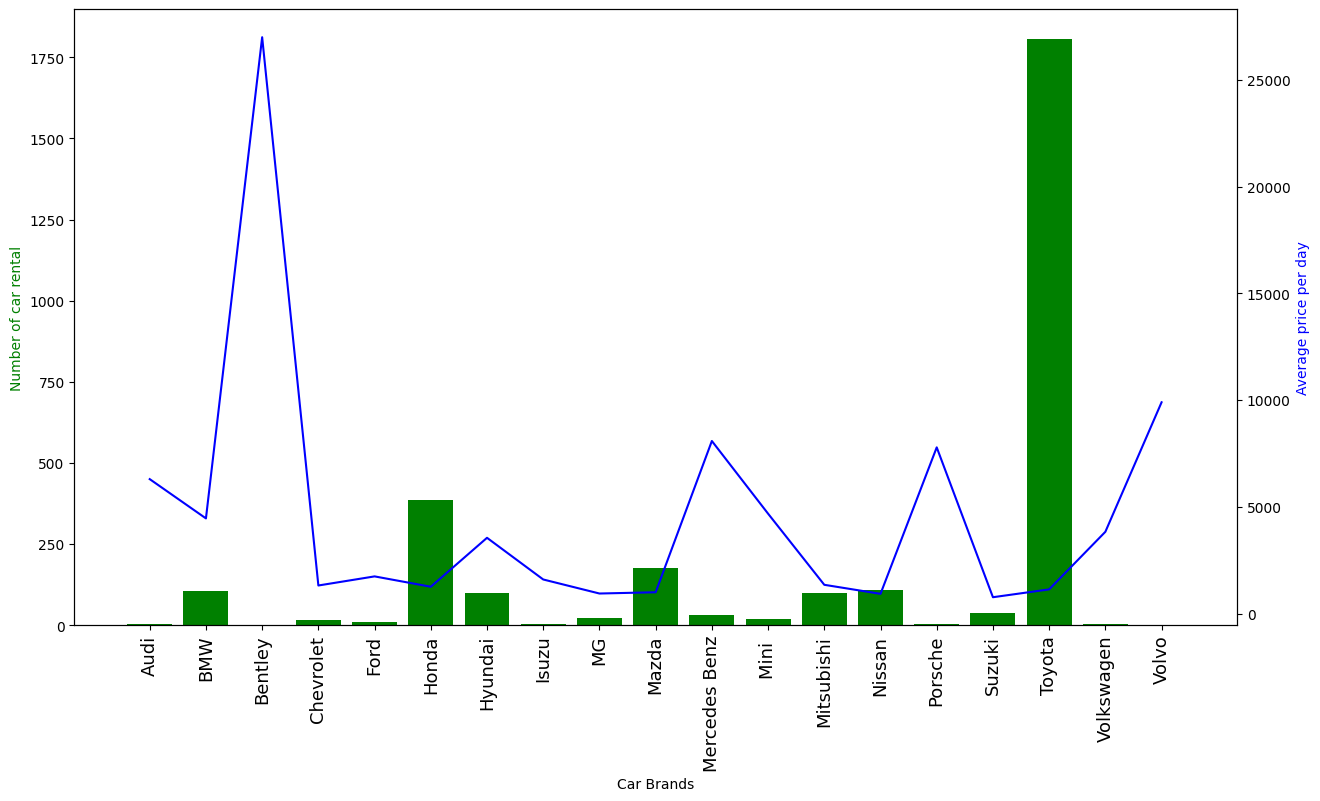

In [235]:
fig, ax1 = plt.subplots(figsize=(15,8))
brand = [car__brand for car__brand, df in df.groupby('car__brand')]
ax2 = ax1.twinx()
ax1.bar(brand,car_brand, color='g')
ax2.plot(brand,prices, 'b-')
ax1.set_xlabel('Car Brands')
ax1.set_ylabel('Number of car rental', color='g')
ax2.set_ylabel('Average price per day', color= 'b')
ax1.set_xticklabels(brand, rotation='vertical', size = 13)

plt.show()

The price per day of BMW, Mercedes Benz, or Porsche is quite high so the number of rented cars is less than other brands, although they are high-class brands.

Which month has the most sale?

In [236]:
month_sum = df.groupby(['month'])['total_amount'].sum()
month_sum.sort_values(ascending=False)

month
11    2467840.80
10    2440802.61
12    2389098.41
7     1319672.38
9     1230264.61
8     1107043.85
5     1074714.76
6     1046804.37
3      537228.54
4      444406.35
1      383068.03
2      245161.82
Name: total_amount, dtype: float64

In [237]:
order_month_count = df.groupby(['month'])['order_id'].count()
order_month_count.sort_values(ascending=False)

month
11    610
10    526
12    480
8     272
7     265
9     215
6     166
5     137
3      94
4      65
1      55
2      49
Name: order_id, dtype: int64

In [238]:
price_month = df.groupby(['month'])['price_per_day'].sum()
price_month.sort_values(ascending=False)

month
11    742550.0580
12    704776.9800
10    696932.0924
7     447742.1300
8     393420.2500
9     332054.6400
6     273164.3100
5     243966.9800
3     161058.0000
4     120001.0000
1     115989.0000
2      72912.0000
Name: price_per_day, dtype: float64

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


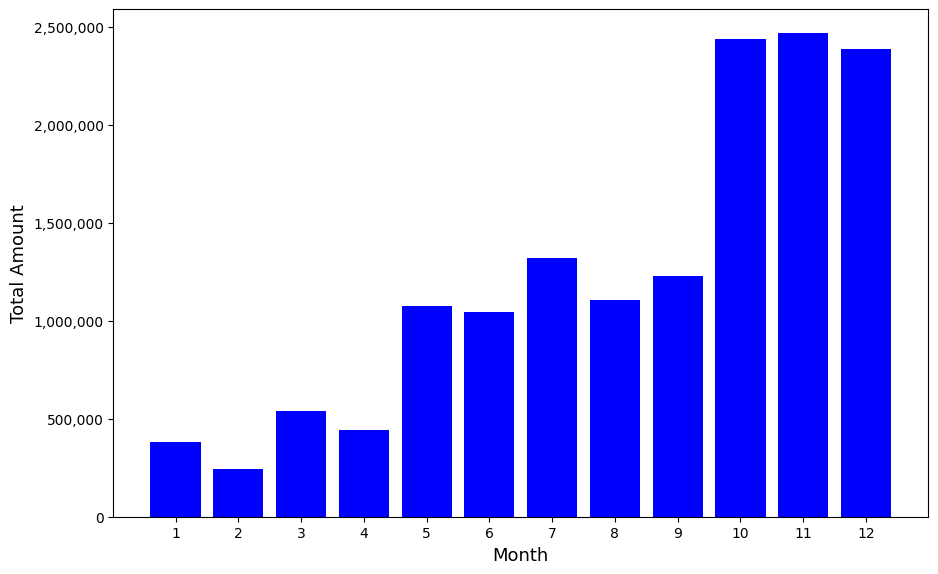

In [239]:
fig , ax = plt.subplots(figsize=(9,6))
months = range(1,13)
plt.bar(months,month_sum,color='b')
plt.xlabel('Month', fontsize = 13)

plt.ylabel('Total Amount', fontsize = 13)
plt.tight_layout()

plt.xticks(months)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

In [240]:
month_price = pd.pivot_table(df, values=["price_per_day"],
                                   index=["month"],
                          columns=["day_name"],aggfunc= 'mean',
                                   fill_value=0,margins=True
                                  )
 
# Naming the index, can be generated
mon_name = [['Jan', 'Feb', 'Mar', 'Apr',
             'May', 'Jun', 'Jul', 'Aug',
             'Sep','Oct', 'Nov', 'Dec','All']]

day_name = [('price_per_day','Monday'),
            ('price_per_day','Tuesday'),
            ('price_per_day','Wednesday'),
            ('price_per_day','Thursday'),
            ('price_per_day','Friday'),
            ('price_per_day','Saturday'),
            ('price_per_day','Sunday'),
           ('price_per_day','All')]
 
# Indexing using Month Names
month_price = month_price.reindex(columns=day_name)
month_price = month_price.set_index(mon_name)

In [241]:
month_price

price_per_day                                                      \
day_name        Monday      Tuesday    Wednesday     Thursday       Friday   
Jan        2312.500000  1800.000000  2504.454545  2094.545455  1007.777778   
Feb        1768.090909  1083.166667  1604.000000  1202.083333  1562.250000   
Mar        1731.714286  1405.000000  1830.000000  1885.571429  1565.875000   
Apr        3402.500000  2039.733333  1193.714286  1699.166667  1432.181818   
May        1765.607647  1677.333333  2265.872857  1901.846154  1541.000000   
Jun        1256.875000  1895.157895  1346.560000  1731.379310  2079.307750   
Jul        1306.441176  1290.404762  1602.500000  1711.876000  2669.566071   
Aug        1520.800000  1510.470000  1729.969149  1165.180600  1469.768545   
Sep        1307.339286  2004.035714  1310.253200  1777.481111  1464.607111   
Oct        1128.833824  1199.592651  1305.579529  1677.453058  1166.835455   
Nov        1105.903663  1417.399259  1132.352234  1238.582209  1140.680845   
Dec        1209.150606  1471.227971  1592.877200  1547.794110  1694.435429   
All        1328.129040  1460.522089  1483.459621  1563.693772  1554.879977   

                                                 
day_name     Saturday       Sunday          All  
Jan       2948.000000  2270.000000  2108.890909  
Feb       1800.000000  1616.666667  1488.000000  
Mar       2350.000000  1672.000000  1713.382979  
Apr       1516.666667   980.000000  1846.169231  
May       1317.911579  2368.625000  1780.780876  
Jun       1221.733333  1544.214286  1645.568133  
Jul       1241.514333  1174.010526  1689.592943  
Aug       1183.446154  1507.336364  1446.397978  
Sep       1637.352941  1661.176471  1544.440186  
Oct       1224.617317  1354.571429  1324.965955  
Nov       1376.180714  1200.542581  1217.295177  
Dec       1358.665714  1450.521923  1468.285375  
All       1370.590073  1436.295159  1467.132734

November has the highest sales and number of orders followed by October and December. That is because the price per day in November has the lowest value, resulting in high sales and a high total period. 

In [242]:
pie = df.groupby('rental_category')['rental_category'].count()
label = [rental_category for rental_category, df in df.groupby('rental_category')] 
pie

rental_category
airport     351
car        2542
driver       41
Name: rental_category, dtype: int64

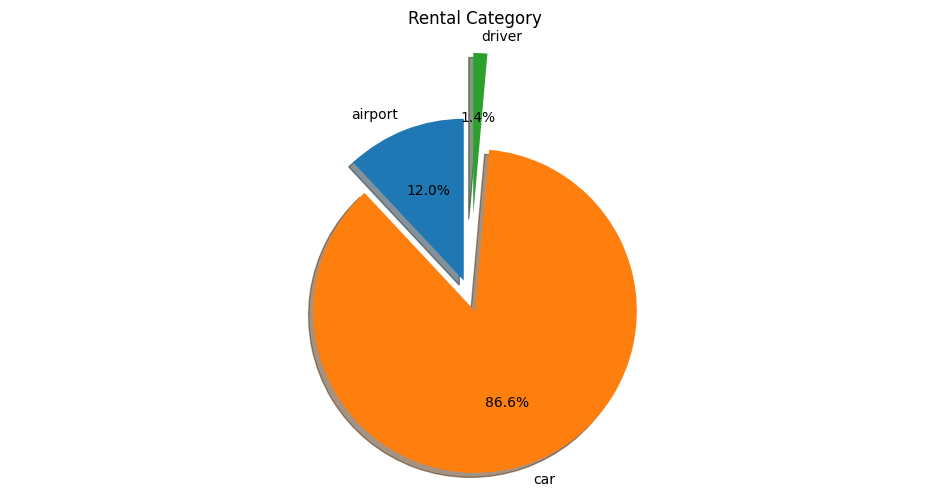

In [243]:

explode = (0.1, 0.1, 0.5)

fig, ax = plt.subplots(figsize = (12,6))
ax.pie(pie,
       explode=explode,
       labels=label,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Rental Category')


plt.show()

In [244]:
rental_category = pd.pivot_table(df, values=['price_per_day','order_id','total_period'], index=['rental_category'],aggfunc = {'price_per_day':'mean','order_id':'count','total_period':'sum'},margins=True )

In [245]:
rental_category.columns = ['Number of Order','Average Price Pper Day','Total period']
rental_category

,Number of Order,Average Price Pper Day,Total period
rental_category,,,
airport,351,761.753505,351.0
car,2542,1546.985035,9775.5
driver,41,2555.024390,56.0
All,2934,1467.132734,10182.5


This graph show that most of customers rented only a car to drive by the customer itself, there is a small number of customers that rented
a car at an airport and only 1.4% rented a car with a driver. Beacuse the price of car with driver is expensive compare to rent with a car only.

Total period, number of order and total amount of each day

In [246]:
daily_report = pd.pivot_table(df, values=['total_amount','total_period','order_id'], index=['date'], aggfunc= {'total_amount':'sum','total_period':'sum','order_id':'count'})
daily_report

,order_id,total_amount,total_period
date,,,
2019-01-02,2,23197.60,6.0
2019-01-04,3,7864.50,7.0
2019-01-05,1,27873.50,5.0
2019-01-06,1,4087.40,2.0
2019-01-08,1,1722.70,1.0
...,...,...,...
2019-12-27,11,58814.31,45.0
2019-12-28,2,6805.20,3.0
2019-12-29,7,36090.90,19.0


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


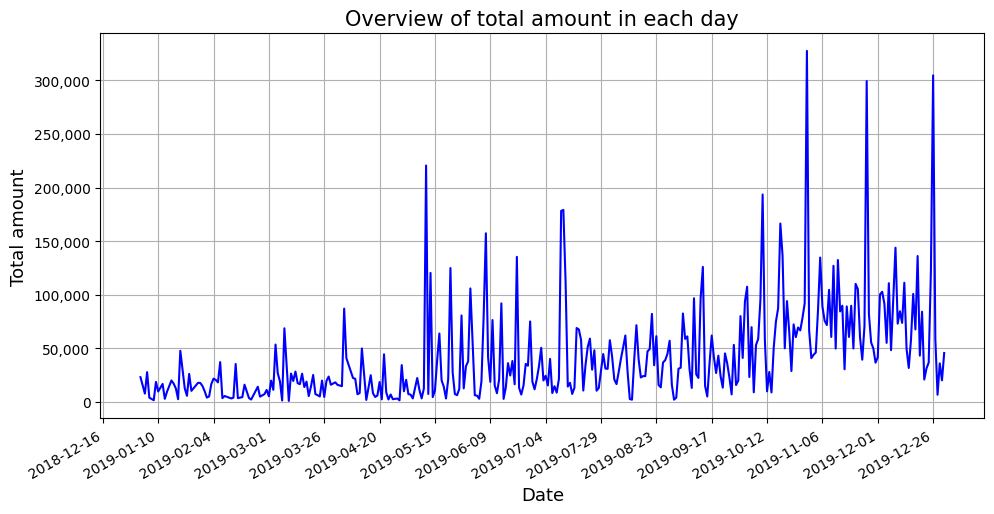

In [247]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(10,5))

half_year_locator = mdates.DayLocator(interval=25)
year_month_formatter = mdates.DateFormatter("%Y-%m-%d")

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

plt.plot(daily_report.index, daily_report['total_amount'],color='b')
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Total amount', fontsize = 13)
plt.grid()
plt.tight_layout()
plt.title('Overview of total amount in each day', fontsize = 15)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.gcf().autofmt_xdate()
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


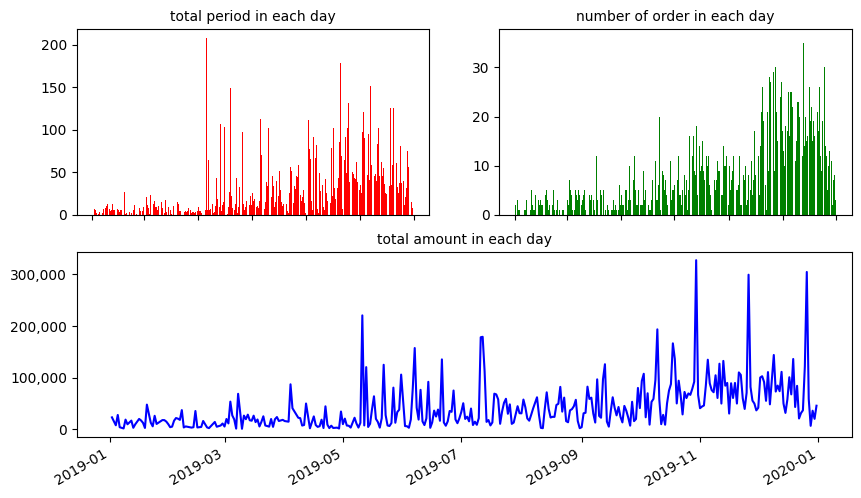

In [248]:
import matplotlib.gridspec as gridspec

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(10,6))
ax = plt.subplot(gs[0, 0]) # row 0, col 0
ax.set_title('total period in each day', fontsize = 10)
plt.bar(daily_report.index, daily_report['total_period'],color='r')

ax = plt.subplot(gs[0, 1]) # row 0, col 1
ax.set_title('number of order in each day', fontsize = 10)
plt.bar(daily_report.index, daily_report['order_id'],color='g')

ax = plt.subplot(gs[1, :]) # row 1, span all columns
ax.set_title('total amount in each day', fontsize = 10)
plt.plot(daily_report.index, daily_report['total_amount'],color='b')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

plt.gcf().autofmt_xdate()

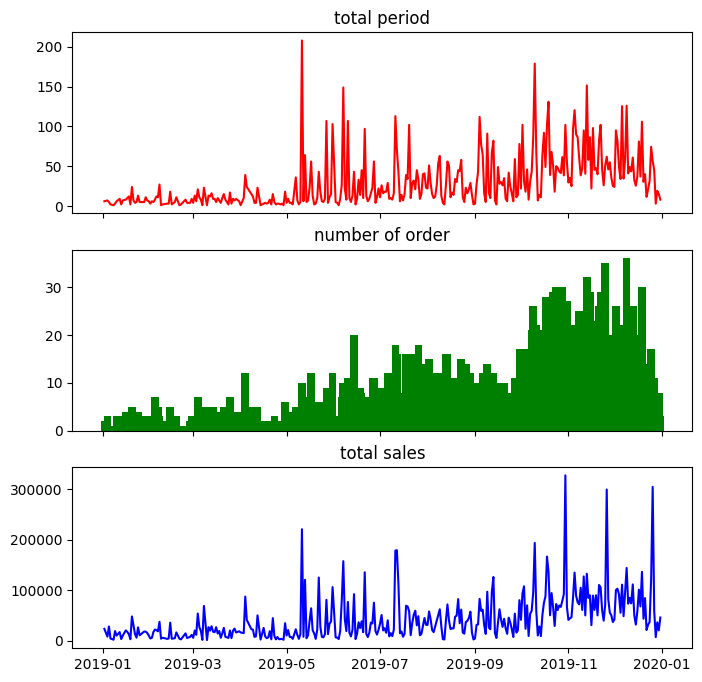

In [249]:
fig, axs = plt.subplots(3,  figsize=(8,8), sharex = True)
axs[0].set_title('total period')
axs[0].plot(daily_report.index, daily_report['total_period'],color='r')
axs[1].set_title('number of order')
axs[1].bar(daily_report.index, daily_report['order_id'],color='g',width=5)
axs[2].set_title('total sales')
axs[2].plot(daily_report.index, daily_report['total_amount'],color='b')

Analyze Period

Text(133.22222222222223, 0.5, 'Months')

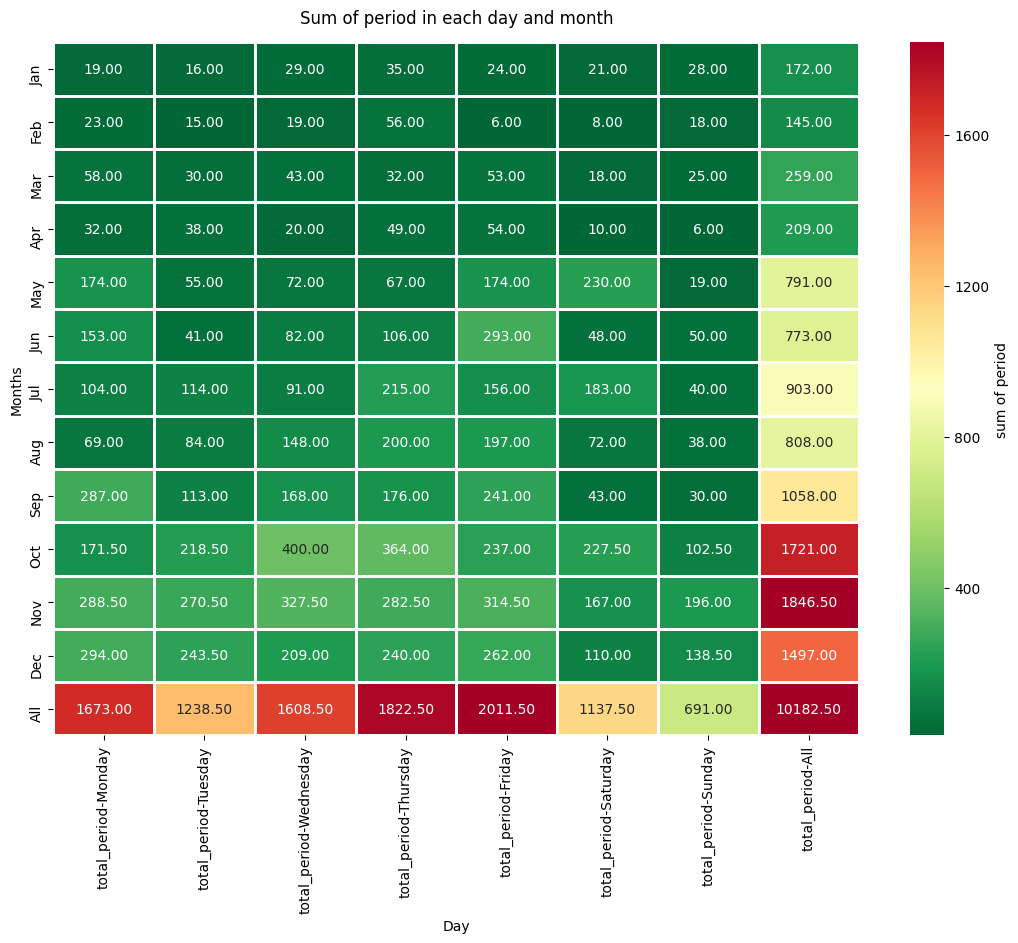

In [250]:
table_df = pd.pivot_table(df, values=["total_period"],
                                   index=["month"],
                          columns=["day_name"],aggfunc= 'sum',
                                   fill_value=0,margins= True
                                  )
 
# Naming the index, can be generated
# using calendar.month_abbr[i]
mon_name = [['Jan', 'Feb', 'Mar', 'Apr',
             'May', 'Jun', 'Jul', 'Aug',
             'Sep','Oct', 'Nov', 'Dec','All']]

day_name = [('total_period','Monday'),
            ('total_period','Tuesday'),
            ('total_period','Wednesday'),
            ('total_period','Thursday'),
            ('total_period','Friday'),
            ('total_period','Saturday'),
            ('total_period','Sunday'),
           ('total_period','All')]
 
# Indexing using Month Names
table_df = table_df.reindex(columns=day_name)
table_df = table_df.set_index(mon_name)

# Creating a heatmap using sns with Red,
# Yellow & Green Colormap.
plt.figure(figsize=(13,9))
ax = sns.heatmap(table_df, cmap='RdYlGn_r',
                 robust=True, fmt='.2f',
                 annot=True, linewidths=1,
                 annot_kws={'size':10},
                 cbar_kws={'shrink':1,
                           'label':'sum of period'})                      
 
# Setting the Tick Labels, Title and x & Y labels
ax.set_yticklabels(ax.get_yticklabels())
ax.set_xticklabels(ax.get_xticklabels())

plt.title('Sum of period in each day and month', pad=14)
plt.xlabel('Day')
plt.ylabel('Months')

<AxesSubplot:xlabel='period', ylabel='frequency'>

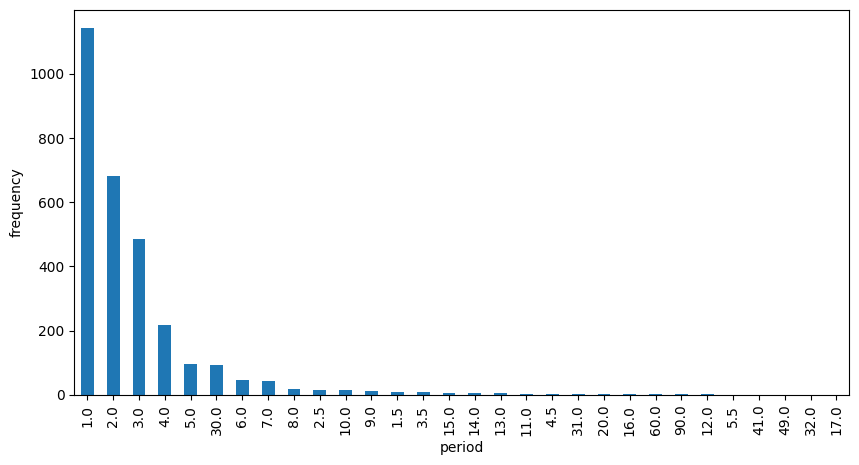

In [251]:
fig, ax = plt.subplots(figsize=(10,5))
df['total_period'].value_counts().plot(ax=ax, kind='bar', xlabel='period', ylabel='frequency')

And most of the customer rented a car for 1 period.

Text(133.22222222222223, 0.5, 'Months')

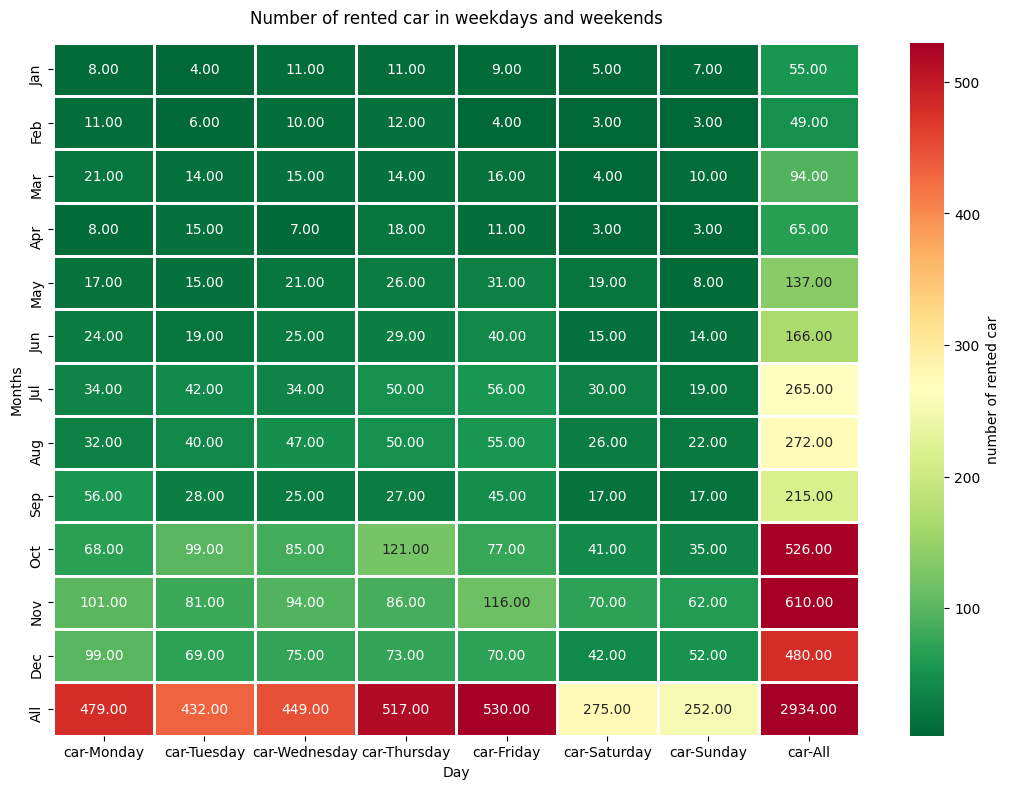

In [252]:
table_df = pd.pivot_table(df, values=["car"],
                                   index=["month"],
                          columns=["day_name"],aggfunc= 'count',
                                   fill_value=0,margins=True
                                  )
 
# Naming the index, can be generated
# using calendar.month_abbr[i]
mon_name = [['Jan', 'Feb', 'Mar', 'Apr',
             'May', 'Jun', 'Jul', 'Aug',
             'Sep','Oct', 'Nov', 'Dec','All']]
day_name = [('car','Monday'),
            ('car','Tuesday'),
            ('car','Wednesday'),
            ('car','Thursday'),
            ('car','Friday'),
            ('car','Saturday'),
            ('car','Sunday'),
           ('car','All')]
 
# Indexing using Month Names
table_df = table_df.reindex(columns=day_name)
table_df = table_df.set_index(mon_name)
 
# Creating a heatmap using sns with Red,
# Yellow & Green Colormap.
plt.figure(figsize=(13,9))
ax = sns.heatmap(table_df, cmap='RdYlGn_r',
                 robust=True, fmt='.2f',
                 annot=True, linewidths=1,
                 annot_kws={'size':10},
                 cbar_kws={'shrink':1,
                           'label':'number of rented car'})                      
 
# Setting the Tick Labels, Title and x & Y labels
ax.set_yticklabels(ax.get_yticklabels())
ax.set_xticklabels(ax.get_xticklabels())

plt.title('Number of rented car in weekdays and weekends', pad=14)
plt.xlabel('Day')
plt.ylabel('Months')

The number of car rentals on Friday is the highest number followed by Thursday. Also, total period on Monday, Thursday, and Friday has the highest total period compared to other days. It happened in 4th quarter which is October to December. Because there are many festivals and annual holidays that included Monday and Friday as the holiday.

Rent Channel

Based on my assumptions, a website can track which device the customer used.So the data in the column rent_channel can be android and iOS, so I will include both of them in the "web" category since the website can track customers' devices.

And by phone, it means that the customer calls the call center to rent a car. And the line means the customer rents a car via the line's official account.

In [253]:
cleanup_rent = {"rent_channel":     {"ios": "web", "android": "web"}}
df= df.replace(cleanup_rent)

<AxesSubplot:ylabel='rent_channel'>

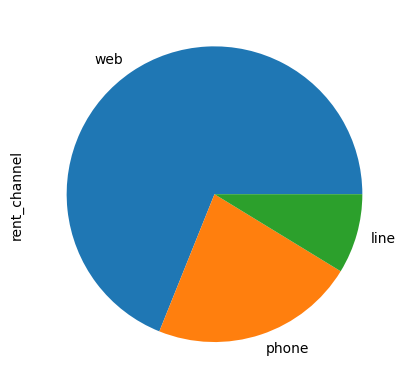

In [254]:
rent_channel = df.groupby('rent_channel')['rent_channel'].count().sort_values(ascending=False)
rent_channel.plot(kind='pie')

In [255]:
discount_channel = df[['rent_channel','promotion_amount','discount_amount','redeem_amount']]


In [256]:
df_promotion = discount_channel.query('promotion_amount != 0 ')
df_promotion = df_promotion.filter(['rent_channel', 'promotion_amount'])
# Group the value according to a condition
df_promotion.groupby('rent_channel').count()

,promotion_amount
rent_channel,
line,15
phone,6
web,210


In [257]:
df_discount = discount_channel.query('discount_amount != 0 ')
df_discount = df_discount.filter(['rent_channel', 'discount_amount'])
# Group the value according to a condition
df_discount.groupby('rent_channel').count()

,discount_amount
rent_channel,
line,16
phone,12
web,86


In [258]:
df_redeem = discount_channel.query('redeem_amount != 0 ').head()
df_redeem = df_redeem.filter(['rent_channel', 'promotion_amount','redeem_amount'])
# Group the value according to a condition
df_redeem.groupby('rent_channel').count()

,promotion_amount,redeem_amount
rent_channel,,
web,5,5


Chennel that they use to rent the car the most is website because the company provide many discount and promotion on website.

Number of order, price per day, total amount, and total period of each day

In [259]:
day = pd.pivot_table(df, values=['total_amount','total_period','order_id','price_per_day'], 
                     index=['day_name'], 
                     aggfunc={'total_amount':'sum','total_period':'sum','order_id':'count','price_per_day':'mean'})

In [260]:
day

,order_id,price_per_day,total_amount,total_period
day_name,,,,
Friday,530,1554.879977,2663899.78,2011.5
Monday,479,1328.129040,2098700.64,1673.0
Saturday,275,1370.590073,1635831.98,1137.5
Sunday,252,1436.295159,1033471.06,691.0
Thursday,517,1563.693772,2776468.63,1822.5
Tuesday,432,1460.522089,2061723.85,1238.5
Wednesday,449,1483.459621,2416010.59,1608.5


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


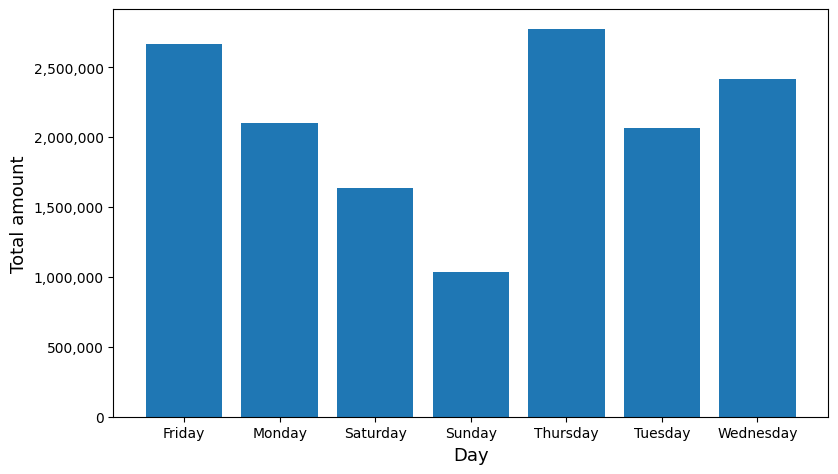

In [261]:
fig = plt.figure(figsize=(8,5))
plt.bar(day.index, day['total_amount'])
plt.xlabel('Day', fontsize = 13)
plt.ylabel('Total amount', fontsize = 13)
plt.tight_layout()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

Thursday, Friday, and Monday have more sale than other days, and that because of total period in these days are a lot and the price per day are high.

Total amount according to Number of order and total period

In [262]:
daily_report.describe()

,order_id,total_amount,total_period
count,342.000000,342.000000,342.000000
mean,8.578947,42941.831959,29.773392
std,7.655977,45532.991204,32.880803
min,1.000000,1070.000000,1.000000
25%,3.000000,13131.575000,7.000000
50%,6.000000,27964.450000,16.000000
75%,12.000000,59094.857500,43.000000
max,36.000000,327522.200000,208.000000


In [265]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = daily_report[['order_id','total_period']].values
y = daily_report['total_amount'].values
model = LinearRegression().fit(X,y)

In [266]:
x1 = X[:, 0]
x2 = X[:, 1]
z = y


x_pred = np.linspace(0, 40, 100)   # range of porosity values
y_pred = np.linspace(0, 180, 100)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T



ols = LinearRegression()
model = ols.fit(X, y)
predicted = model.predict(model_viz)
r2 = model.score(X,y)


In [267]:

print('Model Score (coeddicient of determinatoin) : ' + str(r2))
print('Intercept : ', model.intercept_)
print('Slope : ', model.coef_)

Model Score (coeddicient of determinatoin) : 0.6790554280060863
Intercept :  5407.710169272381
Slope :  [1083.64111603  948.41803267]


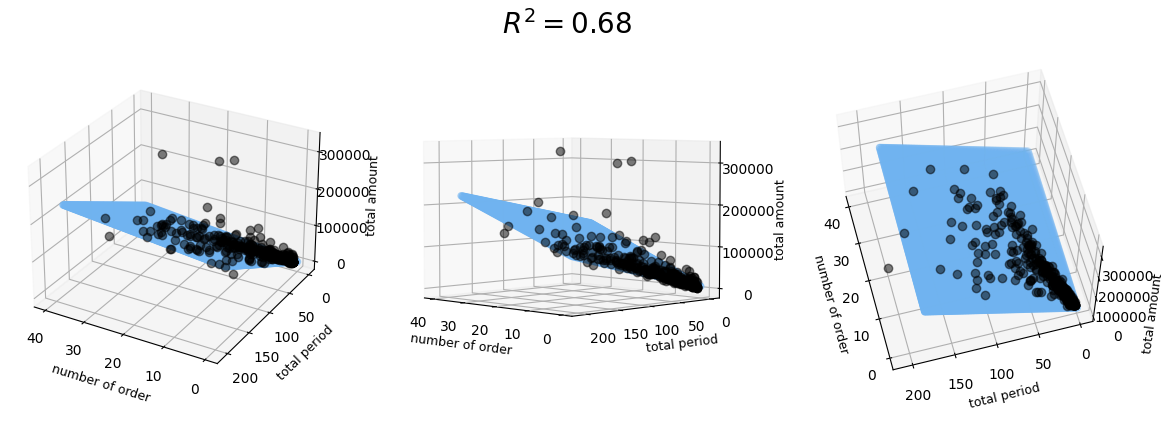

In [268]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x1, x2, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('number of order', fontsize=9)
    ax.set_ylabel('total period', fontsize=9)
    ax.set_zlabel('total amount', fontsize=9)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=135)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

If the number of order and total period are increasing then total amount is increasing too.

In [269]:
daily_report.reset_index(inplace = True)
daily_report

,date,order_id,total_amount,total_period
0,2019-01-02,2,23197.60,6.0
1,2019-01-04,3,7864.50,7.0
2,2019-01-05,1,27873.50,5.0
3,2019-01-06,1,4087.40,2.0
4,2019-01-08,1,1722.70,1.0
...,...,...,...,...
337,2019-12-27,11,58814.31,45.0
338,2019-12-28,2,6805.20,3.0
339,2019-12-29,7,36090.90,19.0
340,2019-12-30,8,20297.50,15.0


In [270]:
import datetime as dt
daily_report['date'] = pd.to_datetime(daily_report['date'])
daily_report.index = daily_report['date']
daily_report.index = (daily_report.index - pd.to_datetime('1970-01-01')).days

In [271]:
daily_report

,date,order_id,total_amount,total_period
date,,,,
17898,2019-01-02,2,23197.60,6.0
17900,2019-01-04,3,7864.50,7.0
17901,2019-01-05,1,27873.50,5.0
17902,2019-01-06,1,4087.40,2.0
17904,2019-01-08,1,1722.70,1.0
...,...,...,...,...
18257,2019-12-27,11,58814.31,45.0
18258,2019-12-28,2,6805.20,3.0
18259,2019-12-29,7,36090.90,19.0


In [272]:

daily_report.isnull().sum()

date            0
order_id        0
total_amount    0
total_period    0
dtype: int64

In [273]:
daily_report.shape

(342, 4)

In [274]:
daily_report

,date,order_id,total_amount,total_period
date,,,,
17898,2019-01-02,2,23197.60,6.0
17900,2019-01-04,3,7864.50,7.0
17901,2019-01-05,1,27873.50,5.0
17902,2019-01-06,1,4087.40,2.0
17904,2019-01-08,1,1722.70,1.0
...,...,...,...,...
18257,2019-12-27,11,58814.31,45.0
18258,2019-12-28,2,6805.20,3.0
18259,2019-12-29,7,36090.90,19.0


In [275]:
#Month, Total amount using polynomial regression

In [276]:
mont_order = df.groupby('month')['order_id'].count()
mont_order

month
1      55
2      49
3      94
4      65
5     137
6     166
7     265
8     272
9     215
10    526
11    610
12    480
Name: order_id, dtype: int64

In [277]:
y = np.asarray(mont_order)
X = np.asarray(mont_order.index.values)

In [278]:
X = X.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [279]:
#polynomial
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 5, include_bias = False)
x_poly = poly_features.fit_transform(X_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)
score = lin_reg.score(x_poly, y_train)
print('Coefficients of x are', lin_reg.coef_)
print('Intercept is', lin_reg.intercept_)
print('Model score', score)

Coefficients of x are [ 5.83852873e+02 -3.34295182e+02  8.24203418e+01 -8.87165311e+00
  3.46801002e-01]
Intercept is -277.07669274926593
Model score 0.9597568743499243


In [280]:
#linear model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
score = regression_model.score(X_train, y_train)
print('Coefficients of x are', regression_model.coef_)
print('Intercept is', regression_model.intercept_)
print('Model score', score)

Coefficients of x are [41.45539906]
Intercept is -42.572769953051676
Model score 0.7500741234148605


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


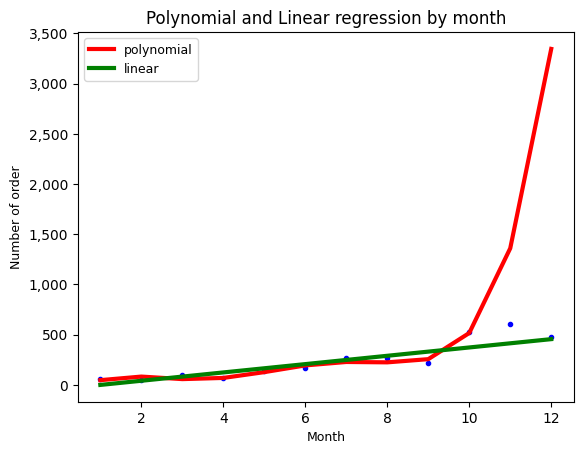

In [281]:
x_new = X.reshape(-1, 1)
x_new_poly = poly_features.transform(x_new)
y_new = lin_reg.predict(x_new_poly)
y_pred = regression_model.predict(X)
plt.plot(month_sum.index.values, y, 'b.')
plt.plot(x_new, y_new, "r-", linewidth = 3, label ="polynomial")
plt.plot(X, y_pred, "g", linewidth = 3, label ="linear")
plt.xlabel("Month", fontsize = 9)
plt.ylabel("Number of order", rotation = 90, fontsize = 9)

plt.legend(loc ="upper left", fontsize = 9)
  
plt.title("Polynomial and Linear regression by month")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

In [282]:
#Date and total amount, linear and polynomial regression

In [283]:
y = np.asarray(daily_report['total_amount'])
X = np.asarray(daily_report.index.values)

In [284]:
regression_model = LinearRegression()

In [285]:
X_lin = X.reshape(-1,1)
regression_model.fit(X_lin, y)
score = regression_model.score(X_lin, y)
print('Coefficients of x are', lin_reg.coef_)
print('Intercept is', lin_reg.intercept_)
print('Model score', score)

Coefficients of x are [ 5.83852873e+02 -3.34295182e+02  8.24203418e+01 -8.87165311e+00
  3.46801002e-01]
Intercept is -277.07669274926593
Model score 0.23581008225110567


In [286]:
y_pred = regression_model.predict(X_lin)

In [287]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(8)
X_transform = poly.fit_transform(X.reshape(-1, 1))
#Fit the data(train the model)
regression_model.fit(X_transform, y.reshape(-1, 1))

LinearRegression()

In [288]:
# Prediction for historical dates. Let’s call it learned values.
y_learned = regression_model.predict(X_transform)

In [289]:
#Now, add future dates to the date index and pass that index to
#the regression model for future prediction.
#As we have converted date index into a range index, hence, here we
#just need to add 3650 days ( roughly 10 yrs)
#to the previous index. x gives the last value of the series.
newindex = np.asarray(pd.RangeIndex(start = 18261 , stop = 18261+130))

In [290]:
#Convert the extended dimension x in the higher degree polynomial expression
X_extended_transform = poly.fit_transform(newindex.reshape(-1, 1))
#Prediction for future dates. Let’s call it predicted values.
y_predict = regression_model.predict(X_extended_transform)
#Print the last predicted value

In [291]:
X = pd.to_datetime(daily_report.index, origin='1970-01-01', unit='D')
future_x = pd.to_datetime(newindex, origin='1970-01-01', unit='D')

In [292]:
X

DatetimeIndex(['2019-01-02', '2019-01-04', '2019-01-05', '2019-01-06',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-12',
               '2019-01-13', '2019-01-14',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=342, freq=None)

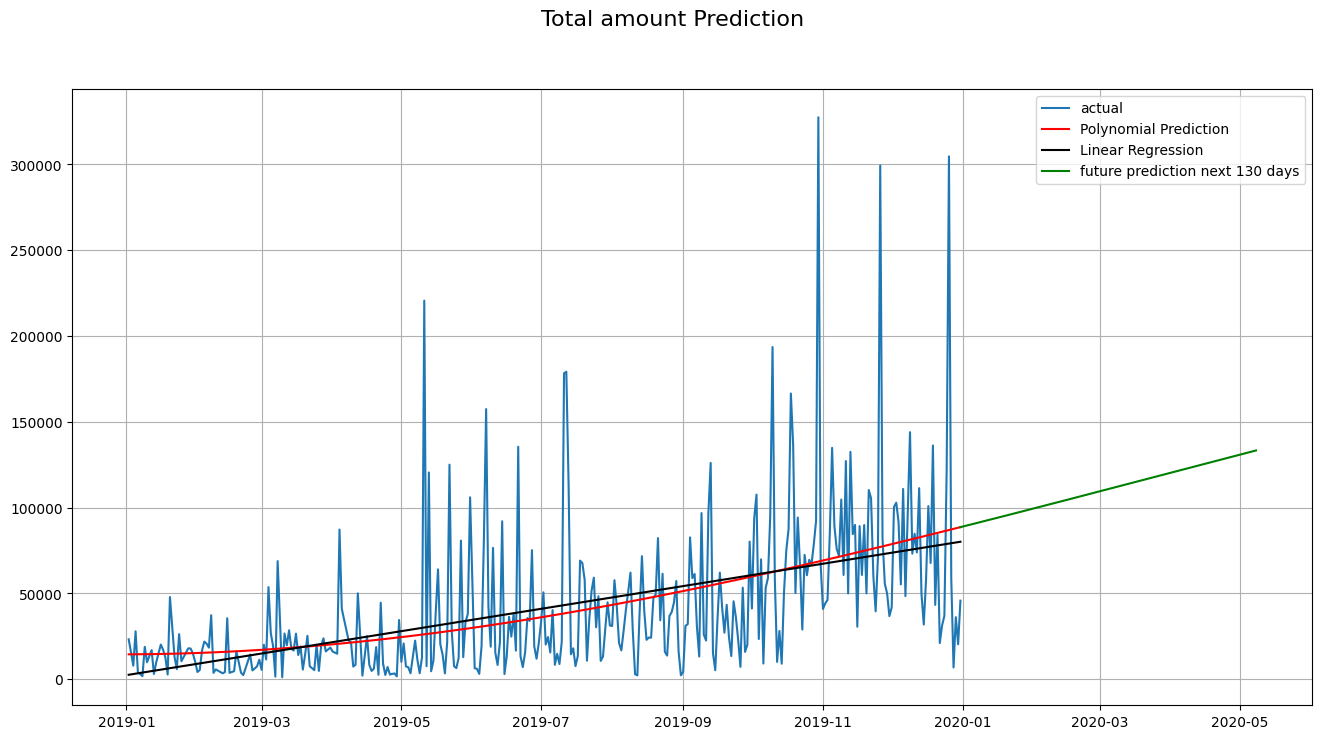

In [293]:
#Setting figure size
from matplotlib.pylab import rcParams
rcParams = 20,10
#Plot the actual data
plt.figure(figsize=(16,8))
plt.plot(X,daily_report['total_amount'], label='actual')
#Plot the regression model
plt.plot(X,y_learned, color='r', label='Polynomial Prediction')
#Plot the linear regression model
plt.plot(X_lin, y_pred, color='black', label='Linear Regression')
#Plot the future predictions
plt.plot(future_x,y_predict, color='g', label='future prediction next 130 days')
#Set the title of the graph
plt.suptitle('Total amount Prediction', fontsize=16)
plt.grid()

plt.legend()
#display the graph
plt.show()

As you can see the total amount will keep increasing if there is no external factors, but as we already known,
in the year 2020-2021, there was covid-19 that restriced the travel so I think this external factor will effecting the total amount of 
car rental company, the total amount will be decreasing in the year 2020 and 2021.

Model predict total price per day by using car barnd, model ,and car_owner_user_status

In [294]:
df2 = df[['car__brand','car__model','car__owner__user_status','price_per_day']]

In [295]:
df2

,car__brand,car__model,car__owner__user_status,price_per_day
0,Mini,Countryman,private,6480.0
1,Honda,City,private,850.0
2,Mazda,2,private,700.0
3,Toyota,Yaris,local,990.0
4,Toyota,Vios,private,850.0
...,...,...,...,...
3199,Mitsubishi,Attrage,private,650.0
3200,Mitsubishi,Attrage,private,650.0
3201,Toyota,Vios,local,1350.0
3202,Mini,Cooper Hatch 3 door,private,5000.0


In [296]:
mean_price = df.groupby(['car__brand','car__model','car__owner__user_status'])['price_per_day'].mean()

In [297]:
print(df.merge(mean_price, on=['car__brand','car__model','car__owner__user_status'], how='left'))

          order_id rent_channel payment_method  \
0     DM5427-26129          web         credit   
1     DM5619-26120          web       transfer   
2     DM6425-26102          web       transfer   
3     DM6010-26093          web         credit   
4     DM1907-26090          web         credit   
...            ...          ...            ...   
2929  DM2551-11316          web         credit   
2930  DM2551-11314          web         credit   
2931  DM3984-11303          web       transfer   
2932  DM3477-11297          web         credit   
2933   DM683-11293          web         credit   

                                 car car__owner__user_status  car__brand  \
0              5427:Mini  Countryman                 private       Mini    
1                    5619:Honda City                 private       Honda   
2                       6425:Mazda 2                 private       Mazda   
3                  6010:Toyota Yaris                   local      Toyota   
4                  

In [298]:
df3 = pd.pivot_table(df, values=['price_per_day'], index=['car__brand','car__model','car__owner__user_status'])

In [299]:
df3.reset_index(inplace = True)
df3

,car__brand,car__model,car__owner__user_status,price_per_day
0,Audi,TT S,private,6300.000000
1,BMW,Series 1,local,2000.000000
2,BMW,Series 3,local,6500.000000
3,BMW,Series 3,member,3550.000000
4,BMW,Series 3,private,4360.693269
...,...,...,...,...
121,Toyota,Yaris,private,760.287840
122,Toyota,Yaris,pro,888.173077
123,Toyota,Yaris Ativ,private,625.000000
124,Volkswagen,Caravelle,private,3833.333333


In [300]:
df3["car"] = df3["car__brand"] +' '+ df3["car__model"]
df3.drop(columns=['car__brand','car__model'], inplace=True)

In [301]:
df_dummy = pd.get_dummies(df3['car'])
df_dummy = pd.concat([df3, df_dummy], axis = 1)

In [302]:
df_dummy1 = pd.get_dummies(df3['car__owner__user_status'])
df_dummy1 = pd.concat([df_dummy, df_dummy1], axis = 1)

In [303]:
df_dummy1.head()

,car__owner__user_status,price_per_day,car,Audi TT S,BMW Series 1,BMW Series 3,BMW Series 5,BMW Series 7,BMW X1,BMW X3,...,Toyota Ventury,Toyota Vios,Toyota Yaris,Toyota Yaris Ativ,Volkswagen Caravelle,Volvo S90,local,member,private,pro
0,private,6300.000000,Audi TT S,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,local,2000.000000,BMW Series 1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,local,6500.000000,BMW Series 3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,member,3550.000000,BMW Series 3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,private,4360.693269,BMW Series 3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [304]:
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [305]:
X = df_dummy1.drop(['car','price_per_day','car__owner__user_status'], axis=1)
y = df_dummy1['price_per_day']

In [306]:
model = LinearRegression().fit(X,y)

In [307]:
r_sq = model.score(X,y)
print('Model Score (coeddicient of determinatoin) : ' + str(r_sq))

Model Score (coeddicient of determinatoin) : 0.9213395317337294


In [308]:
y

0      6300.000000
1      2000.000000
2      6500.000000
3      3550.000000
4      4360.693269
          ...     
121     760.287840
122     888.173077
123     625.000000
124    3833.333333
125    9900.000000
Name: price_per_day, Length: 126, dtype: float64

In [309]:
y_pred = model.predict(X)
print('predicted respone : ',y_pred,sep='\n')

predicted respone : 
[ 6320.  1942.  5038.  4566.  5063.  8230.  8255. 11975.  5382.  4910.
  5407.  4650. 27001.  1348.  1308.  1008.  1845.  1870.   822.  1934.
  1959.  3190.  2012.  1558.  1583.   667.   810.  1307.  2538.   784.
   312.   809.  2040.  1064.  1089.  2320.  1664.  1192.  1689.  1063.
  1088.  1626.  7305.  7330.  8561.  1471.  1601.  1137.   852.  1776.
  1118.   646.  1143.  1294.  2090.  4620.  6307.  7297.  8469. 26011.
 12010. 15762.  3660.  4157.  5295.   974.   999.  1207.  1024.  1358.
  1383.  2614.  1805.   661.   189.   686.  1917.  1105.   694.  1167.
  1898.  2503.  7751.  1170.   698.  1165.   755.   780.  5720.   712.
   737.  1968.  1036.  1324.  1349.  2580.  1886.  1911.  3142.  4464.
  4002.  1530.  1555.  2786.  1423.  1448.  1529.  1554.   875.  2215.
   829.   854.  2085.  4735.  2460.  3691.   874.   402.   899.  2130.
   461.   486.  1717.   624.  3831.  9898.]


In [310]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          price_per_day   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     7.062
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           3.44e-11
Time:                        22:14:09   Log-Likelihood:                -1069.0
No. Observations:                 126   AIC:                             2296.
Df Residuals:                      47   BIC:                             2520.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Audi TT S             

So if the model is BM series 5 and status is local then the pricer per day according to the model will be equal to 5028
while the actual value is 6500

When the most order happen?

In [311]:
data.head()
data['created_at'] = pd.to_datetime(data['created_at'])

In [312]:
data['Hour'] = data['created_at'].dt.hour
data['Minute'] = data['created_at'].dt.minute
data.head(5)

,created_at,order_id,rent_channel,payment_method,car,car__owner__user_status,car__brand,car__model,rental_category,total_period,...,redeem_amount,total_amount,hold_amount,tax_withholding,status,confirm_at,complete_at,cancel_at,Hour,Minute
0,2019-12-31 19:34:00,DM5427-26129,ios,credit,5427:Mini Countryman,private,Mini,Countryman,car,5.0,...,0.0,42693.0,0,0.0,complete,12/31/2019 20:46,1/7/2020 22:44,NaN,19,34
1,2019-12-31 14:02:00,DM5619-26120,web,transfer,5619:Honda City,private,Honda,City,car,2.0,...,0.0,1999.2,5000,98.0,complete,48:18.7,15:30.3,NaN,14,2
2,2019-12-31 09:37:00,DM6425-26102,web,transfer,6425:Mazda 2,private,Mazda,2,car,1.0,...,0.0,1048.6,5000,0.0,complete,48:50.6,48:31.4,NaN,9,37
3,2019-12-30 23:05:00,DM6010-26093,ios,credit,6010:Toyota Yaris,local,Toyota,Yaris,car,1.0,...,0.0,1358.9,0,0.0,complete,06:24.2,28:00.5,NaN,23,5
4,2019-12-30 20:28:00,DM1907-26090,web,credit,1907:Toyota Vios,private,Toyota,Vios,car,2.0,...,0.0,2203.2,0,108.0,complete,38:36.1,15:30.5,NaN,20,28


In [313]:
data.groupby('Hour')['Hour'].count()

Hour
0      27
1      26
2      18
3      10
4      13
5       9
6      17
7      27
8      97
9     184
10    324
11    283
12    219
13    264
14    293
15    284
16    280
17    221
18    108
19    108
20    124
21    106
22     93
23     69
Name: Hour, dtype: int64

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


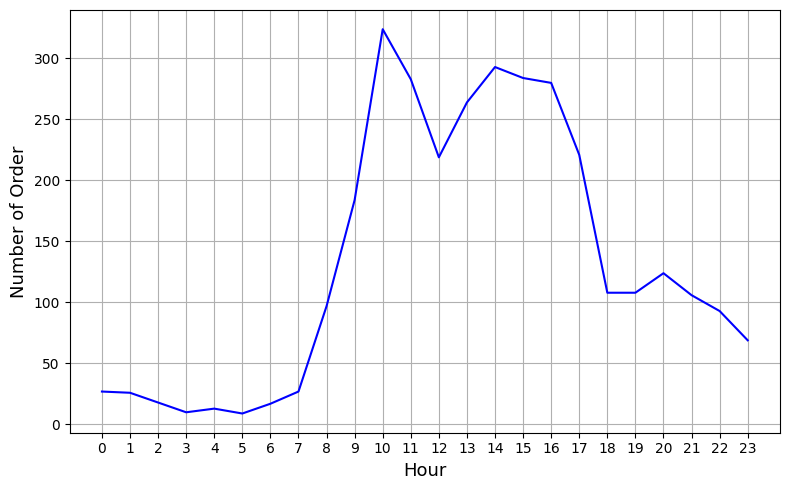

In [314]:
fig , ax = plt.subplots(figsize=(8,5))
hours = [hour for hour, df in data.groupby('Hour')]
plt.plot(hours,data.groupby('Hour')['Hour'].count(),color='b')
plt.xlabel('Hour', fontsize = 13)
plt.xticks(hours)
plt.ylabel('Number of Order', fontsize = 13)
plt.grid()
plt.tight_layout()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

Most of orders happened in the morning and started decresing in the afternoon.

Advice: In my opinion, if they want to increase more profit, they can provide more promotion or discount to the high class brand
    eventhough the high class berand likes BMW, Porsche, and Mercedes Benz does not have the high number of car rentals
    but they are generate more sale than Mazda that the high number of car rentals but generated few total amount. 
    Another thing is that they should lower the price per day of the high calss brand because the less price per day,
    the more period that customers will rent and also more sales.

They should launch the promotion in the afternoon as most of time people will make an order at that time. 
And the perfect time to launch those promotions is in the end of the year. Accroding to the number of order that incresing 
in the end of the year because there were many holidays in those months.

Price per day of cars is depend on brand model and owner status, if the brand is high class, new model and the status is pro
then the price per day will be really high